# Chapter 7: Math Games

<div id="toc"></div>

## 7.1 Preprocessing Data Prior to Visualization

## 7.2 Modules math and cmath

In [150]:
import math
math.sqrt(-1)

ValueError: math domain error

In [90]:
import cmath
cmath.sqrt(-1)

1j

In [91]:
from math import ceil
ceil(2.5)

3

In [92]:
type(ceil(2.5))

int

In [93]:
from math import ceil
ceil(2.5)

3

In [94]:
type(ceil(2.5))

int

### 7.2.1 Example: Mandelbrot Set

In [95]:
c=0.4+1j*0.5

In [96]:
z=0

In [97]:
z=z**2+c; print(z, abs(z))

(0.4+0.5j) 0.6403124237432849


In [98]:
z=z**2+c; print(z, abs(z))

(0.31000000000000005+0.9j) 0.9518928511129812


In [99]:
z=z**2+c; print(z, abs(z))

(-0.31389999999999996+1.0580000000000003j) 1.1035838028894773


In [100]:
z=z**2+c; print(z, abs(z))

(-0.6208307900000004-0.16421240000000004j) 0.64218111318053


In [101]:
z=z**2+c; print(z, abs(z))

(0.7584651574982646+0.7038962280395922j) 1.0347653332940918


In [102]:
z=z**2+c; print(z, abs(z))

(0.4797994952905018+1.5677615269249674j) 1.6395376668399924


In [103]:
z=z**2+c; print(z, abs(z))

(-1.827668649625085+2.0044223787089317j) 2.7125784348275634


In [104]:
# %load 0053-7-src-Ch07/src/mandelbrot.py
from PIL import Image, ImageOps

# creates an image of the Mandelbrot set
res = 400
iters = 200

img = Image.new("L", (res, res), 255)
for im in range(res):
    for re in range(res):
        z = 0
        # a scaling to show the "interesting" part of the Mandelbrot fractal
        c = (re*2/res-1.5)+1j*(im*2/res-1)
        for k in range(iters):
            z = z**2+c
            if abs(z)>2:
#                 print(type((re,im)))
#                 print(255-k*255/iters)
                img.putpixel((re, im), int(255-k*255/iters))
#                 img.putpixel((re, im), 255)
                break
                
# create a uniform distribution of gray levels
img = ImageOps.equalize(img)

# save to file
img.save('images/mandelbrot_%d_%d.png' % (iters, res), dpi=(150,150))

![](./images/mandelbrot_200_400.png)

### 7.2.2 Example: A Newton Fractal

* Note If you’d like to read more about Newton’s method, have a look at http://en.wikipedia.org/wiki/Newton%27s_method; there’s a lot of additional information available on the Internet.

In [105]:
from cmath import pi, cos, sin
solutions = [ cos((2*n+1)*pi/4) + \
             1j*sin((2*n+1)*pi/4) for n in range(4)]

In [106]:
from pprint import pprint
pprint([ z**4 for z in solutions])

[(-1.0000000000000004+0j),
 (-1+4.440892098500626e-16j),
 (-1.0000000000000004+6.661338147750941e-16j),
 (-1+8.881784197001252e-16j)]


In [107]:
# %load 0053-7-src-Ch07/src/newton.py
from PIL import Image
from cmath import *

# creates a z**4+1 = 0 fractal using the Newton-Raphson 
# root finding method
delta       = 0.000001  # convergence criteria
res         = 800       # image size
iters       = 30        # number of iterations

# create an image to draw on, paint it black
img = Image.new("RGB", (res, res), (0, 0, 0))

# these are the solutions to the equation z**4+1 = 0 (Euler's formula)
solutions = [cos((2*n+1)*pi/4)+1j*sin((2*n+1)*pi/4) for n in range(4)]
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0)]

for re in range(res):
    for im in range(res):
        z = (re+1j*im)/res
        for i in range(iters):
            try:
                z -= (z**4+1)/(4*z**3)
            except ZeroDivisionError:
                # possibly divide by zero exception
                continue
            if(abs(z**4+1)<delta):
                break

        # color depth is a function of the number of iterations
        color_depth = int((iters-i)*255.0/iters)

        # find to which solution this guess converged to
        err = [ abs(z-root) for root in solutions ]
        distances = zip(err, range(len(colors)))

        # select the color associated with the solution
        color = [i*color_depth for i in colors[min(distances)[1]]]
        img.putpixel((re, im), tuple(color))

img.save('images/newton_z4s_%03d_%03d_%03d.png' % \
    (iters, res, abs(log10(delta))), dpi=(150,150))


![](images/newton_z4s_030_800_005.png)

In [108]:
from cmath import sqrt
z=sqrt(2)/2*(1+1j)
z

(0.7071067811865476+0.7071067811865476j)

In [109]:
err = [abs(z-root) for root in solutions]
err

[0.0, 1.414213562373095, 2.0, 1.4142135623730954]

In [110]:
zip(err, range(len(colors)))
list(_)

[0.0, 1.414213562373095, 2.0, 1.4142135623730954]

In [111]:
distances = list(zip(err, range(len(colors))))
min(distances)

(0.0, 0)

In [112]:
min(distances)[1]

0

In [113]:
colors[min(distances)[1]]

(1, 0, 0)

In [114]:
color = [i*color_depth for i in colors[min(distances)[1]]]
img.putpixel((re, im), tuple(color))

In [115]:
'../images/newton_z4s_%03d_%03d_%03d.png' % (iters, res, abs(log10(delta)))

'../images/newton_z4s_030_800_005.png'

## 7.3 Module decimal

https://docs.python.org/3.3/library/decimal.html.

In [116]:
from decimal import *
Decimal('3.3')

Decimal('3.3')

In [117]:
Decimal(3.3)

Decimal('3.29999999999999982236431605997495353221893310546875')

In [118]:
a = Decimal('3.3')
a*a

Decimal('10.89')

In [119]:
a-13

Decimal('-9.7')

In [120]:
a = Decimal('3.3')
sqrt(a)

(1.816590212458495+0j)

In [121]:
exp(Decimal('1'))

(2.718281828459045+0j)

## 7.4 Module fractions

https://docs.python.org/3.3/library/fractions.html.

In [122]:
from fractions import *
Fraction(2, 7)

Fraction(2, 7)

In [123]:
Fraction('2/7')

Fraction(2, 7)

In [124]:
Fraction(_)

Fraction(2, 7)

In [125]:
Fraction(1.22)

Fraction(5494391545392005, 4503599627370496)

In [126]:
Fraction(3, 4)**2

Fraction(9, 16)

In [127]:
Fraction('3.14')

Fraction(157, 50)

In [128]:
Fraction(22, 7) - Fraction('3.14')

Fraction(1, 350)

## 7.5 Module random

### 7.5.1 Using Module random to Solve Probability Questions

* Example: Hard Disk Head

In [129]:
from random import random
N = 1000 # number of files the head seeks
tot_dist = 0
for i in range(N):
    tot_dist += random()*2
tot_dist/N

0.9892843378341475

In [130]:
from random import random
N = 1000 # number of files the head seeks
tot_dist, cur_loc = 0, 0
for i in range(N):
    new_loc = random()
    tot_dist += abs(cur_loc-new_loc)
    cur_loc = new_loc
tot_dist/N

0.3233488270588347

* Example: Friends Meeting

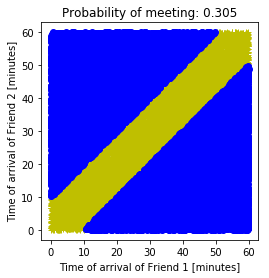

In [131]:
from random import random
from pylab import *

N = 40000 # number of events
# generate N events of friends times
friend1, friend2 = [], []

for i in range(N):
    friend1.append(random())
    friend2.append(random())
    
# find all occurrences of friends meeting
met = array([ (x, y) for (x, y) in zip(friend1, friend2) \
             if abs(y-x) < 1.0/6 ])

not_met = array([ (x, y) for (x, y) in zip(friend1, friend2) \
                 if abs(y-x) >=1.0/6 ])

# plot the result, this might shed some light on the problem!
plot(met[:, 0], met[:,1 ], 'y+', mec='y')
plot(not_met[:, 0], not_met[:, 1], 'bo', mec='b')
title("Probability of meeting: %1.3f" % (float(len(met))/N))
xlabel('Time of arrival of Friend 1 [minutes]')
ylabel('Time of arrival of Friend 2 [minutes]')
xticks([n/6 for n in range(7)], [n*10 for n in range(7)])
yticks([n/6 for n in range(7)], [n*10 for n in range(7)])
axis('scaled')
show()

### 7.5.2 Random Sequences

| Function     | Description                                   |      
|---|---|
| choice(s)    | Returns a random element from the sequence s. |                                        
| shuffle(s)   | Shuffles the sequence s.                      |                    
| sample(s, n) | Returns a subsequence of size n from s.       |                                      

In [132]:
from random import choice, shuffle, sample
cards = list(zip(list(range(1, 14))*4, 'S'*13+'H'*13+'D'*13+'C'*13))
cards[:5]

[(1, 'S'), (2, 'S'), (3, 'S'), (4, 'S'), (5, 'S')]

In [133]:
choice(cards)

(10, 'C')

In [134]:
shuffle(cards)
cards[:5]

[(9, 'H'), (11, 'H'), (8, 'D'), (5, 'C'), (6, 'C')]

In [135]:
sample(cards, 5)

[(8, 'H'), (5, 'H'), (2, 'D'), (3, 'H'), (2, 'C')]

## 7.6 Module NumPy

### 7.6.1 Array Creation

In [136]:
from numpy import *
v = array([1, 2])
v

array([1, 2])

In [137]:
type(v)

numpy.ndarray

In [138]:
m = array([[1, 0],[0, 4]])
m

array([[1, 0],
       [0, 4]])

In [139]:
type(m)

numpy.ndarray

| Function |
|---|
| N-Dimensional Arrays |
| array(s) |
| ones(t) |
| arange([start,] stop[, step]) |
| linspace(start, stop, num=50) |
| logspace(start, stop, num=50) |

### 7.6.2 Slicing, Indexing, and Reshaping

In [140]:
a = arange(12).reshape(4, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [141]:
a[1]

array([3, 4, 5])

In [142]:
a[-1]

array([ 9, 10, 11])

In [143]:
a[1, 1]

4

In [144]:
a[:, 1]

array([ 1,  4,  7, 10])

In [145]:
a[1, :2]

array([3, 4])

### 7.6.3 N-Dimensional Arrays

In [146]:
ones((2, 3, 4))

array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]]])

In [147]:
a = ones((2, 3, 4))
a

array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]]])

In [148]:
a[0,...]

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [149]:
a[0, 1, ...]

array([ 1.,  1.,  1.,  1.])

* Example: Comparing Mortgages

http://en.wikipedia.org/wiki/Fixed-rate_mortgage

> the CONVeNIeNCe OF USING araNGe( ) aND LINSpaCe( )

In [151]:
interest_rates = [x/2.0+3 for x in range(5)]

In [152]:
interest_rates = arange(3.0, 5.5, 0.5)

In [153]:
interests = linspace(3.0, 5.0, 5)

In [155]:
# %load 0053-7-src-Ch07/src/ndflat.py
from numpy import *
loans           = arange(100000, 160000, 20000)
num_payments    = arange(5, 30, 5)*12
interests       = arange(3, 5.5, 0.5)/100.0/12.0

# method 1, storing results in a list
res1 = []

# method 2, storing results in an array	
res2 = zeros([len(loans), len(num_payments), len(interests)])

for i, loan in enumerate(loans):
    for j, num_pay in enumerate(num_payments):
        for k, interest in enumerate(interests):
            res1.append([loan, num_pay, interest, \
                -pmt(interest, num_pay, loan)])
            res2[i][j][k]=-pmt(interest, num_pay, loan)


In [158]:
exec(open('0053-7-src-Ch07/src/ndflat.py').read())
for row in res1:
    if(row[0] == 120000 and row[1] == 120):
        print(row)

[120000, 120, 0.0025000000000000001, 1158.7289363806954]
[120000, 120, 0.0029166666666666668, 1186.6304095428363]
[120000, 120, 0.0033333333333333335, 1214.941657978555]
[120000, 120, 0.0037499999999999999, 1243.6609050842044]
[120000, 120, 0.0041666666666666666, 1272.7861828689065]


In [159]:
res2[1, 1, ...]

array([ 1158.72893638,  1186.63040954,  1214.94165798,  1243.66090508,
        1272.78618287])

In [161]:
values = res2[1, 1, :]
for i, v in enumerate(values):
    row = [loans[1], num_payments[1], interests[i], v]
    print(row)

[120000, 120, 0.0025000000000000001, 1158.7289363806954]
[120000, 120, 0.0029166666666666668, 1186.6304095428363]
[120000, 120, 0.0033333333333333335, 1214.941657978555]
[120000, 120, 0.0037499999999999999, 1243.6609050842044]
[120000, 120, 0.0041666666666666666, 1272.7861828689065]


In [163]:
exec(open('0053-7-src-Ch07/src/ndflat.py').read())
res2.shape

(3, 5, 5)

In [164]:
[n1, n2, n3] = [range(i) for i in res2.shape]
n1, n2, n3

(range(0, 3), range(0, 5), range(0, 5))

### 7.6.4 Math Functions

* Example: Visualizing Fourier Expansion of a Rectangular Wave

C:\Anaconda36\lib\site-packages\ipykernel\__main__.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Anaconda36\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda36\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


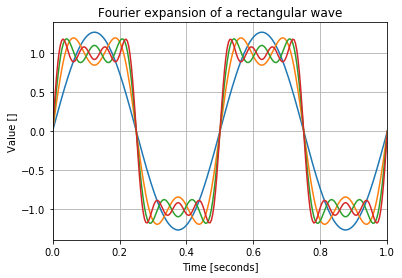

In [165]:
# plots a Fourier expansion of a rectangular wave
from pylab import *
# prepare the plot
figure()
hold(True)
# number of points to display the wave
N = 2**8
t = linspace(0, 1, N)
y = zeros(N)
for n in range(1, 8, 2):
    # the sine waves, added
    y += 4/(pi*n)*sin(2*pi*n*t*2)
    # plot the graph
    plot(t, y)
    
# annotate the graph
axis([0, 1, -1.4, 1.4])
grid()
xlabel('Time [seconds]')
ylabel('Value []')
title('Fourier expansion of a rectangular wave')
show()

### 7.6.5 Array Methods and Properties

In [166]:
import numpy
[m for m in dir(numpy.ndarray) if not(m.startswith('__'))]

['T',
 'all',
 'any',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'astype',
 'base',
 'byteswap',
 'choose',
 'clip',
 'compress',
 'conj',
 'conjugate',
 'copy',
 'ctypes',
 'cumprod',
 'cumsum',
 'data',
 'diagonal',
 'dot',
 'dtype',
 'dump',
 'dumps',
 'fill',
 'flags',
 'flat',
 'flatten',
 'getfield',
 'imag',
 'item',
 'itemset',
 'itemsize',
 'max',
 'mean',
 'min',
 'nbytes',
 'ndim',
 'newbyteorder',
 'nonzero',
 'partition',
 'prod',
 'ptp',
 'put',
 'ravel',
 'real',
 'repeat',
 'reshape',
 'resize',
 'round',
 'searchsorted',
 'setfield',
 'setflags',
 'shape',
 'size',
 'sort',
 'squeeze',
 'std',
 'strides',
 'sum',
 'swapaxes',
 'take',
 'tobytes',
 'tofile',
 'tolist',
 'tostring',
 'trace',
 'transpose',
 'var',
 'view']

* Example: A Magic Square

In [167]:
from pylab import *
def magicsq(n=3):
    """Returns a magic square of size n; n must be odd"""
    if n % 2 != 1:
        raise ValueError("Magic(n) requires n to be odd")
    m, row, col = zeros([n, n]), 0, n//2
    
    for num in range(1, n**2+1):
        m[row, col] = num # fill the cell
        col = (col+1) % n
        row = (row-1) % n
        if m[row, col]:
            col = (col-1) % n
            row = (row+2) % n
    return m

def testmagicsq(m):
    """Returns True if m is a magic square."""
    msum = sum(m[0, :])
    return all(m.sum(0) == msum) and all(m.sum(1) == msum)

In [169]:
exec(open('0053-7-src-Ch07/src/magic_square.py').read())
a = eye(2, 3)
a

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [170]:
a.sum(0)

array([ 1.,  1.,  0.])

In [171]:
a.sum(1)

array([ 1.,  1.])

In [172]:
m = magicsq(5)
m.sum(0)

array([ 65.,  65.,  65.,  65.,  65.])

In [173]:
m.sum(1)

array([ 65.,  65.,  65.,  65.,  65.])

In [174]:
testmagicsq(m)

True

In [175]:
m = magicsq(5)
m.trace()

65.0

In [176]:
fliplr(m).trace()

65.0

### 7.6.6 Other Useful Array Functions

In [ ]:
import numpy
dir(numpy)

In [178]:
help(numpy.diff)

Help on function diff in module numpy.lib.function_base:

diff(a, n=1, axis=-1)
    Calculate the n-th discrete difference along given axis.
    
    The first difference is given by ``out[n] = a[n+1] - a[n]`` along
    the given axis, higher differences are calculated by using `diff`
    recursively.
    
    Parameters
    ----------
    a : array_like
        Input array
    n : int, optional
        The number of times values are differenced.
    axis : int, optional
        The axis along which the difference is taken, default is the last axis.
    
    Returns
    -------
    diff : ndarray
        The n-th differences. The shape of the output is the same as `a`
        except along `axis` where the dimension is smaller by `n`.
    
    See Also
    --------
    gradient, ediff1d, cumsum
    
    Examples
    --------
    >>> x = np.array([1, 2, 4, 7, 0])
    >>> np.diff(x)
    array([ 1,  2,  3, -7])
    >>> np.diff(x, n=2)
    array([  1,   1, -10])
    
    >>> x = np.array([[

## 7.7 Final Notes and References

* NumPy home page, http://www.numpy.org/  
* The Python Standard Library, https://docs.python.org/3.3/library/index.html  
* “Mandelbrot set,” Wikipedia, http://en.wikipedia.org/wiki/Mandelbrot_set  
* “Newton’s method,” Wikipedia, http://en.wikipedia.org/wiki/Newton%27s_method  
* “De la Loubère Method,” Wikipedia, http://en.wikipedia.org/wiki/Siamese_method  
* “Fourier Series,” Wikipedia, http://en.wikipedia.org/wiki/Fourier_series  